# <h1 align="center">Data Science applied to Movies Ratings</h1>
# <h2 align="center">**By: Juan Carlos Abril Ramírez**</h2>
# <h3 align="center">*Date: August xx of 2022*</h3>

---



*First, we import the neccesary libraries for data cleansing and ETL*

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import tree
from sklearn import preprocessing
import scipy.stats as stats
import graphviz
from sklearn.tree import export_graphviz
import itertools

*Now, we proceed to call the CSV file, stored in my Repository. Then, we visualize the first 5 rows of the newly created table*

In [3]:
imdb_movies = pd.read_csv("imdb_filtered_dataframe.csv")

imdb_movies.head(5)

,Unnamed: 0,Movie Title,Released Year,Runtime,IMDB Rating,Director,Genre,Stars
0,0,12 Angry Men,1957,96 min,9.0,Sidney Lumet,"Crime, Drama","Henry Fonda, Lee J. Cobb, Martin Balsam, John ..."
1,1,12 Years a Slave,2013,134 min,8.1,Steve McQueen,Drama,"Chiwetel Ejiofor, Michael Kenneth Williams, Mi..."
2,2,1917,2019,119 min,8.3,Sam Mendes,Drama,"Dean-Charles Chapman, George MacKay, Daniel Ma..."
3,3,3 Idiots,2009,170 min,8.4,Rajkumar Hirani,"Comedy, Drama","Aamir Khan, Madhavan, Mona Singh, Sharman Joshi"
4,4,A Beautiful Mind,2001,135 min,8.2,Ron Howard,Drama,"Russell Crowe, Ed Harris, Jennifer Connelly, C..."


*We then check the number of rows (should be 1000, since it's a top 1000!) and columns (should be the same as displayed in the output above)*

In [4]:
movies_df = imdb_movies.copy()

In [5]:
movies_df=movies_df.drop(['Unnamed: 0'], axis=1)
movies_df

,Movie Title,Released Year,Runtime,IMDB Rating,Director,Genre,Stars
0,12 Angry Men,1957,96 min,9.0,Sidney Lumet,"Crime, Drama","Henry Fonda, Lee J. Cobb, Martin Balsam, John ..."
1,12 Years a Slave,2013,134 min,8.1,Steve McQueen,Drama,"Chiwetel Ejiofor, Michael Kenneth Williams, Mi..."
2,1917,2019,119 min,8.3,Sam Mendes,Drama,"Dean-Charles Chapman, George MacKay, Daniel Ma..."
3,3 Idiots,2009,170 min,8.4,Rajkumar Hirani,"Comedy, Drama","Aamir Khan, Madhavan, Mona Singh, Sharman Joshi"
4,A Beautiful Mind,2001,135 min,8.2,Ron Howard,Drama,"Russell Crowe, Ed Harris, Jennifer Connelly, C..."
...,...,...,...,...,...,...,...
277,Witness for the Prosecution,1957,116 min,8.4,Billy Wilder,"Crime, Drama","Tyrone Power, Marlene Dietrich, Charles Laught..."
278,Yôjinbô,1961,110 min,8.2,Akira Kurosawa,Drama,"Toshirô Mifune, Eijirô Tôno, Tatsuya Nakadai, ..."
279,Zerkalo,1975,107 min,8.1,Andrei Tarkovsky,Drama,"Margarita Terekhova, Filipp Yankovskiy, Ignat ..."
280,Zindagi Na Milegi Dobara,2011,155 min,8.1,Zoya Akhtar,"Comedy, Drama","Hrithik Roshan, Farhan Akhtar, Abhay Deol, Kat..."


In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie Title    282 non-null    object 
 1   Released Year  282 non-null    int64  
 2   Runtime        282 non-null    object 
 3   IMDB Rating    282 non-null    float64
 4   Director       282 non-null    object 
 5   Genre          282 non-null    object 
 6   Stars          282 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 15.5+ KB


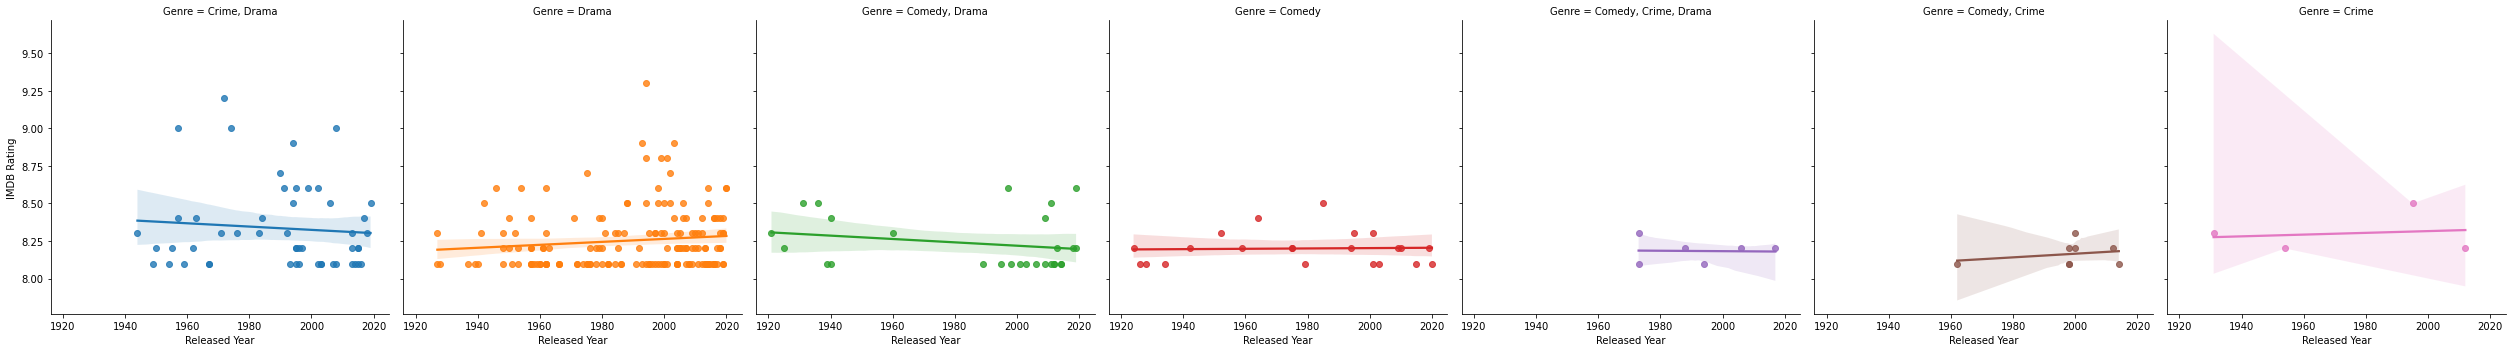

In [ ]:
sns.lmplot(data=movies_df, x="Released Year", y="IMDB Rating", col="Genre", hue="Genre")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


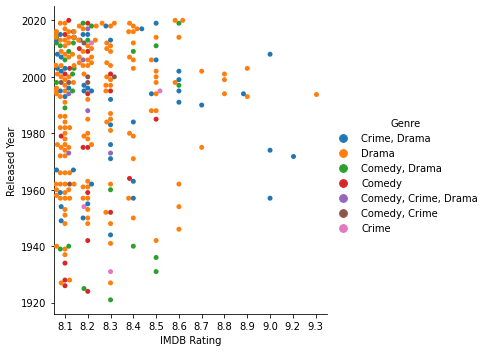

In [ ]:
sns.catplot(data=movies_df, kind="swarm", x="IMDB Rating", y="Released Year", hue="Genre")

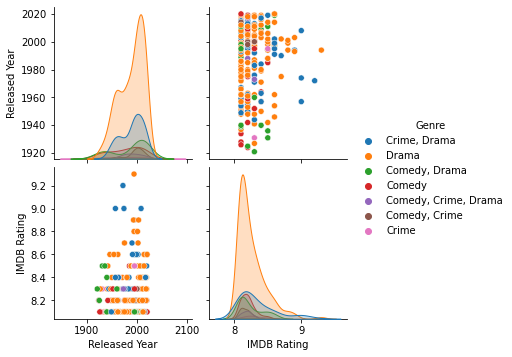

In [ ]:
sns.pairplot(data=movies_df, hue="Genre")

In [6]:
X, y = movies_df[['Released Year']], movies_df['IMDB Rating']

In [7]:
lr = LinearRegression()
lr.fit(X, y)
print('R-squared: {:.4f}'.format(lr.score(X, y)))

R-squared: 0.0011


In [8]:
movies_df['Runtime'] = movies_df.Runtime.str.replace('min' , '')

In [9]:
column_names = movies_df.columns.values
column_names[2] = "Runtime (min)"
movies_df.columns = column_names

In [10]:
X1, y1 = movies_df[['Runtime (min)']], movies_df['IMDB Rating']

In [11]:
lr1 = LinearRegression()
lr1.fit(X1, y1)

print('R-squared: {:.4f}'.format(lr1.score(X1, y1)))

R-squared: 0.0300


In [12]:
movies_df_1=movies_df['Genre'].str.split(r", ", expand=True)

In [13]:
movies_df_1.rename(columns={0:'Genre 1', 1:'Genre 2', 2:'Genre 3'},inplace=True)

In [14]:
movies_df_2=pd.concat([movies_df, movies_df_1], axis=1)

In [15]:
movies_df_2.drop(columns=['Genre'])

,Movie Title,Released Year,Runtime (min),IMDB Rating,Director,Stars,Genre 1,Genre 2,Genre 3
0,12 Angry Men,1957,96,9.0,Sidney Lumet,"Henry Fonda, Lee J. Cobb, Martin Balsam, John ...",Crime,Drama,None
1,12 Years a Slave,2013,134,8.1,Steve McQueen,"Chiwetel Ejiofor, Michael Kenneth Williams, Mi...",Drama,None,None
2,1917,2019,119,8.3,Sam Mendes,"Dean-Charles Chapman, George MacKay, Daniel Ma...",Drama,None,None
3,3 Idiots,2009,170,8.4,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",Comedy,Drama,None
4,A Beautiful Mind,2001,135,8.2,Ron Howard,"Russell Crowe, Ed Harris, Jennifer Connelly, C...",Drama,None,None
...,...,...,...,...,...,...,...,...,...
277,Witness for the Prosecution,1957,116,8.4,Billy Wilder,"Tyrone Power, Marlene Dietrich, Charles Laught...",Crime,Drama,None
278,Yôjinbô,1961,110,8.2,Akira Kurosawa,"Toshirô Mifune, Eijirô Tôno, Tatsuya Nakadai, ...",Drama,None,None
279,Zerkalo,1975,107,8.1,Andrei Tarkovsky,"Margarita Terekhova, Filipp Yankovskiy, Ignat ...",Drama,None,None
280,Zindagi Na Milegi Dobara,2011,155,8.1,Zoya Akhtar,"Hrithik Roshan, Farhan Akhtar, Abhay Deol, Kat...",Comedy,Drama,None


In [16]:
one_hot_encoded_data = pd.get_dummies(movies_df_2, columns = ['Genre 1', 'Genre 2', 'Genre 3'])

In [17]:
one_hot_encoded_data

,Movie Title,Released Year,Runtime (min),IMDB Rating,Director,Genre,Stars,Genre 1_Comedy,Genre 1_Crime,Genre 1_Drama,Genre 2_Crime,Genre 2_Drama,Genre 3_Drama
0,12 Angry Men,1957,96,9.0,Sidney Lumet,"Crime, Drama","Henry Fonda, Lee J. Cobb, Martin Balsam, John ...",0,1,0,0,1,0
1,12 Years a Slave,2013,134,8.1,Steve McQueen,Drama,"Chiwetel Ejiofor, Michael Kenneth Williams, Mi...",0,0,1,0,0,0
2,1917,2019,119,8.3,Sam Mendes,Drama,"Dean-Charles Chapman, George MacKay, Daniel Ma...",0,0,1,0,0,0
3,3 Idiots,2009,170,8.4,Rajkumar Hirani,"Comedy, Drama","Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",1,0,0,0,1,0
4,A Beautiful Mind,2001,135,8.2,Ron Howard,Drama,"Russell Crowe, Ed Harris, Jennifer Connelly, C...",0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,Witness for the Prosecution,1957,116,8.4,Billy Wilder,"Crime, Drama","Tyrone Power, Marlene Dietrich, Charles Laught...",0,1,0,0,1,0
278,Yôjinbô,1961,110,8.2,Akira Kurosawa,Drama,"Toshirô Mifune, Eijirô Tôno, Tatsuya Nakadai, ...",0,0,1,0,0,0
279,Zerkalo,1975,107,8.1,Andrei Tarkovsky,Drama,"Margarita Terekhova, Filipp Yankovskiy, Ignat ...",0,0,1,0,0,0
280,Zindagi Na Milegi Dobara,2011,155,8.1,Zoya Akhtar,"Comedy, Drama","Hrithik Roshan, Farhan Akhtar, Abhay Deol, Kat...",1,0,0,0,1,0


In [18]:
X2, y2 = one_hot_encoded_data[['Genre 1_Crime']], one_hot_encoded_data['IMDB Rating']

In [19]:
lr2 = LinearRegression()
lr2.fit(X2, y2)

print('R-squared: {:.4f}'.format(lr2.score(X2, y2)))

R-squared: 0.0304


In [20]:
Z = one_hot_encoded_data[['Genre 1_Crime', 'Genre 1_Drama', 'Genre 1_Comedy', 'Genre 2_Drama']]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    Z, one_hot_encoded_data['IMDB Rating'], test_size=0.3, random_state=42)

In [22]:
lm = LinearRegression()

In [23]:
lm.fit(X_train, y_train)

LinearRegression()

In [24]:
predictions = lm.predict(X_test)

In [25]:
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  0.049686280888529936
mean_absolute_error :  0.15878137298588707


In [26]:
Rcross = cross_val_score(lm, Z[['Genre 1_Crime']], one_hot_encoded_data['IMDB Rating'], cv=4)

In [27]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are -0.042217798754768276 and the standard deviation is 0.02405280327765355


In [28]:
!pip install tensorflow==2.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
# MLP with automatic validation set
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)
# load pima indians dataset
# split into input (X) and output (Y) variables
X = one_hot_encoded_data['Genre 1_Crime']
Y = one_hot_encoded_data['IMDB Rating']
# create model
model = Sequential()
model.add(Dense(2, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(4, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
#model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10)